# Exploratory Data Analysis

- Data collected manually for 36 days using YouTube API
    - scraped 10 most popular videos from 5 countries each day
    - time of collection- 12:00am to 12:30am IST
- Overview of columns in data
    - `id` : video id 
    - `region_code` : country codes - [IN: India, US: USA, BR: Brazil, ID: Indonesia, MX: Mexico]	
    - `publish_date`: date the video was published	
    - `channel_id` : channel id for the channel that uploaded said video
    - `channel_name` : corresponding channel name
    - `title` : video title
    - `category_id` : video category id	
    - `duration` : duration of video	
    - `caption` : does video have captions	
    - `views` : views at time of collection	
    - `likes` : likes at time of collection	
    - `comment_count` : comments at time of collection


# 1. Initial Data Overview

In [3]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: cannot import name 'artist' from partially initialized module 'matplotlib' (most likely due to a circular import) (c:\Users\arush\OneDrive\Desktop\youtube_analysis_project\yt_env\Lib\site-packages\matplotlib\__init__.py)

In [82]:
# importing dataset
df = pd.read_excel('36days_youtube_videos.xlsx')

df.head()

,id,region_code,publish_date,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count
0,XhW3i2f54BQ,IN,2025-02-24T05:37:32Z,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,1,PT1M45S,True,16695651,323858,6688
1,W8x6Dwyj0-A,IN,2025-02-22T11:30:08Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,10,PT2M58S,False,25780803,1588648,115750
2,dbWfo4NAx8M,IN,2025-02-23T17:12:10Z,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not DisappointedÂ atÂ All | #PAKVIND | Sh...,17,PT3M53S,False,2064436,83781,5386
3,DQnZhK6Y27g,IN,2025-02-23T06:11:52Z,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | à...,28,PT29M42S,False,4442627,300654,47471
4,UTaWdNZkGcM,IN,2025-02-23T17:21:39Z,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India à¤•à¥€ Pakistan à¤ªà¤° Virat...,17,PT11M48S,False,1374247,59617,3526


In [83]:
pd.set_option("display.float_format", "{:,.2f}".format) # for easier readibility of large number counts

In [84]:
df.shape

(1800, 12)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1788 non-null   object
 1   region_code    1800 non-null   object
 2   publish_date   1800 non-null   object
 3   channel_id     1800 non-null   object
 4   channel_name   1800 non-null   object
 5   title          1800 non-null   object
 6   category_id    1800 non-null   int64 
 7   duration       1800 non-null   object
 8   caption        1800 non-null   bool  
 9   views          1800 non-null   int64 
 10  likes          1800 non-null   int64 
 11  comment_count  1800 non-null   int64 
dtypes: bool(1), int64(4), object(7)
memory usage: 156.6+ KB


- only `id` has null values - 12 null

In [86]:
df.describe()

,category_id,views,likes,comment_count
count,"1,800.00","1,800.00","1,800.00","1,800.00"
mean,18.09,"2,601,915.56","108,559.56","7,245.53"
std,6.36,"5,123,641.46","206,360.40","14,909.21"
min,1.00,"20,125.00",0.00,0.00
25%,17.00,"401,314.25","13,287.25",845.00
50%,20.00,"930,178.50","38,145.50","2,413.50"
75%,24.00,"2,665,877.75","107,131.75","6,508.75"
max,28.00,"56,602,682.00","2,328,540.00","153,045.00"


- it is interesting to note that even the most popular videos according to youtube have 0 likes or comments


In [136]:
df[(df.likes == 0) | (df.comment_count == 0)].id.count()

np.int64(40)

- 40 most popular videos dont have any likes or comments

In [87]:
df.nunique()

id               1254
region_code         5
publish_date     1248
channel_id        851
channel_name      851
title            1265
category_id        14
duration          929
caption             2
views            1702
likes            1707
comment_count    1534
dtype: int64

- out of 1800 videos, 1254 videos are unique
- unique ids 1256, unique names 1265

## Null Values

In [88]:
df[df['id'].isnull()]

,id,region_code,publish_date,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count
171,NaN,BR,2025-02-27T14:00:06Z,UCuo1V_VlMUOTjy89D1FDVDw,O Canal Oficial da PokÃ©mon em PortuguÃªs,[Brasil] PokÃ©mon Presents | 27.02.2025,20,PT19M16S,False,35316,0,557
232,NaN,ID,2025-02-28T09:06:47Z,UC5BMQOsAB8hKUyHu9KI6yig,KBS WORLD TV,[HOT DEBUT] The Chase - Hearts2Hearts ãƒãƒ¼ãƒ...,24,PT3M25S,False,751676,68072,3414
475,NaN,BR,2025-03-06T21:05:06Z,UCYC7HG92sGQjkcMrs8F4wBA,MUSSA GAME,W SUPREMO!! ELE VOLTOU MAIS FORTE!,24,PT11M56S,False,146359,7745,4602
624,NaN,BR,2025-03-09T23:08:39Z,UC_oToDrJ6uca7d1dFVBmLtg,Canal GOAT,CEARÃ X MARACANÃƒ | CAMPEONATO CEARENSE | AO ...,17,PT3H23M27S,False,561147,21580,6
964,NaN,US,2025-03-17T19:00:33Z,UC0biFgrMdkv1hFAFLVePODQ,Trixie Mattel,Who Is She?! with Caleb Hearon!,24,PT32M33S,False,549822,41760,2526
1306,NaN,IN,2025-03-24T12:35:01Z,UCw5N06QIrXBg92OfOVpvWkg,We Are One,Lala ka Birthday | Sukki Dc | We Are One,23,PT17M48S,False,298187,17117,810
1397,NaN,MX,2025-03-26T02:32:56Z,UC8EdTmyUaFIfZvVttJ9lgIA,ChilevisiÃ³n,CHILE 0-0 ECUADORðŸ† Clasificatorias Mundial ...,24,PT18M45S,False,312493,1892,961
1448,NaN,MX,2025-03-26T02:32:56Z,UC8EdTmyUaFIfZvVttJ9lgIA,ChilevisiÃ³n,CHILE 0-0 ECUADORðŸ† Clasificatorias Mundial ...,24,PT18M45S,False,449649,2351,1150
1490,NaN,MX,2025-03-28T00:00:06Z,UCncmmq2xV1002xNnx9_rDhw,MoratVEVO,"Morat, Camilo - Me Toca A MÃ­ (Video Oficial)",10,PT3M29S,True,608757,102091,5253
1543,NaN,MX,2025-03-28T00:00:06Z,UCncmmq2xV1002xNnx9_rDhw,MoratVEVO,"Morat, Camilo - Me Toca A MÃ­ (Video Oficial)",10,PT3M29S,True,1171528,123869,5707


- i decided to manually add these ids, from searching the videos on youtube and getting the ids

In [89]:
df.at[171, 'id'] = '-n-sxzh_mPk'
df.at[232, 'id'] = '-NYn3BkplZc'
df.at[475, 'id'] = '-WJZvt32838'
df.at[624, 'id'] = 'RKdfhv7ODCM'
df.at[964, 'id'] = '-oSXSqqgZVQ'
df.at[1306, 'id'] = '-ZdfyqKywsQ'
df.at[1397, 'id'] = '-a7f5tggqrA'
df.at[1448, 'id'] = '-a7f5tggqrA'
df.at[1490, 'id'] = '-vOgEO13FYA'
df.at[1543, 'id'] = '-vOgEO13FYA'
df.at[1612, 'id'] = '-u_2wzTaqxE'
df.at[1666, 'id'] = '-u_2wzTaqxE'


In [90]:
df[df['id'].isnull()]

,id,region_code,publish_date,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count


## 1. Feature Engineering

In [91]:
df = df.rename(columns={'publish_date' : 'publish_date_time'}) # renaming appropriately

In [92]:
# splitting date and time into two columns
df[['publish_date', 'publish_time']] = df['publish_date_time'].str.split('T', expand=True)
df['publish_time'] = df['publish_time'].str.rstrip('Z')

df.head()

,id,region_code,publish_date_time,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count,publish_date,publish_time
0,XhW3i2f54BQ,IN,2025-02-24T05:37:32Z,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,1,PT1M45S,True,16695651,323858,6688,2025-02-24,05:37:32
1,W8x6Dwyj0-A,IN,2025-02-22T11:30:08Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,10,PT2M58S,False,25780803,1588648,115750,2025-02-22,11:30:08
2,dbWfo4NAx8M,IN,2025-02-23T17:12:10Z,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not DisappointedÂ atÂ All | #PAKVIND | Sh...,17,PT3M53S,False,2064436,83781,5386,2025-02-23,17:12:10
3,DQnZhK6Y27g,IN,2025-02-23T06:11:52Z,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | à...,28,PT29M42S,False,4442627,300654,47471,2025-02-23,06:11:52
4,UTaWdNZkGcM,IN,2025-02-23T17:21:39Z,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India à¤•à¥€ Pakistan à¤ªà¤° Virat...,17,PT11M48S,False,1374247,59617,3526,2025-02-23,17:21:39


In [93]:
# convert to appropriate data types
df['publish_date_time'] = pd.to_datetime(df['publish_date_time'], utc=True, errors='coerce') 

df['duration_in_min'] = pd.to_timedelta(df['duration'], errors='coerce').dt.total_seconds() #duration in seconds
df['duration_in_min'] = (df['duration_in_min']/60.00).round(2) #duration in minutes

df.dtypes

id                                object
region_code                       object
publish_date_time    datetime64[ns, UTC]
channel_id                        object
channel_name                      object
title                             object
category_id                        int64
duration                          object
caption                             bool
views                              int64
likes                              int64
comment_count                      int64
publish_date                      object
publish_time                      object
duration_in_min                  float64
dtype: object

In [94]:
# df['max_views'] = df.groupby('id')['views'].transform('max')
# df['max_likes'] = df.groupby('id')['likes'].transform('max')
# df['max_comments'] = df.groupby('id')['comment_count'].transform('max')

In [95]:
df.head()

,id,region_code,publish_date_time,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count,publish_date,publish_time,duration_in_min
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,1,PT1M45S,True,16695651,323858,6688,2025-02-24,05:37:32,1.75
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,10,PT2M58S,False,25780803,1588648,115750,2025-02-22,11:30:08,2.97
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not DisappointedÂ atÂ All | #PAKVIND | Sh...,17,PT3M53S,False,2064436,83781,5386,2025-02-23,17:12:10,3.88
3,DQnZhK6Y27g,IN,2025-02-23 06:11:52+00:00,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | à...,28,PT29M42S,False,4442627,300654,47471,2025-02-23,06:11:52,29.70
4,UTaWdNZkGcM,IN,2025-02-23 17:21:39+00:00,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India à¤•à¥€ Pakistan à¤ªà¤° Virat...,17,PT11M48S,False,1374247,59617,3526,2025-02-23,17:21:39,11.80


In [96]:
""""Getting categories for all regions using Youtube Data API"""

# from mypackage import get_youtube_object

# youtube = get_youtube_object()

# categories = {}
# for region in ['IN', 'US', 'BR', 'ID', 'MX']:
#     request = youtube.videoCategories().list(
#             part="snippet",
#             regionCode='IN'
#         )
#     response = request.execute()
#     tmp_dict = {}
#     for i in range(len(response['items'])):
#         tmp_dict[response['items'][i]['id']] = response['items'][i]['snippet']['title']
#     categories[region] = tmp_dict

# print(categories)


'"Getting categories for all regions using Youtube Data API'

In [97]:
# categories = {'IN': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'US': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'BR': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'ID': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'MX': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}}

- since there is no difference between categories of these 5 regions we can simply use one dict

In [98]:
categories = {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}

In [99]:
df['category'] = df['category_id'].apply(lambda x: categories[str(x)] if str(x) in categories.keys() else 'NaN')

df.head()

,id,region_code,publish_date_time,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count,publish_date,publish_time,duration_in_min,category
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,1,PT1M45S,True,16695651,323858,6688,2025-02-24,05:37:32,1.75,Film & Animation
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,10,PT2M58S,False,25780803,1588648,115750,2025-02-22,11:30:08,2.97,Music
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not DisappointedÂ atÂ All | #PAKVIND | Sh...,17,PT3M53S,False,2064436,83781,5386,2025-02-23,17:12:10,3.88,Sports
3,DQnZhK6Y27g,IN,2025-02-23 06:11:52+00:00,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | à...,28,PT29M42S,False,4442627,300654,47471,2025-02-23,06:11:52,29.70,Science & Technology
4,UTaWdNZkGcM,IN,2025-02-23 17:21:39+00:00,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India à¤•à¥€ Pakistan à¤ªà¤° Virat...,17,PT11M48S,False,1374247,59617,3526,2025-02-23,17:21:39,11.80,Sports


In [100]:
# checking for missing categories
df[df['category'] == 'Nan']

,id,region_code,publish_date_time,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count,publish_date,publish_time,duration_in_min,category


## 2. EDA

In [101]:
df.head(3)

,id,region_code,publish_date_time,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count,publish_date,publish_time,duration_in_min,category
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,1,PT1M45S,True,16695651,323858,6688,2025-02-24,05:37:32,1.75,Film & Animation
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,10,PT2M58S,False,25780803,1588648,115750,2025-02-22,11:30:08,2.97,Music
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not DisappointedÂ atÂ All | #PAKVIND | Sh...,17,PT3M53S,False,2064436,83781,5386,2025-02-23,17:12:10,3.88,Sports


In [102]:
df.dtypes

id                                object
region_code                       object
publish_date_time    datetime64[ns, UTC]
channel_id                        object
channel_name                      object
title                             object
category_id                        int64
duration                          object
caption                             bool
views                              int64
likes                              int64
comment_count                      int64
publish_date                      object
publish_time                      object
duration_in_min                  float64
category                          object
dtype: object

In [103]:
categorical = ['title', 'channel_name', 'category', 'caption', 'publish_date', 'publish_time']
numerical = ['duration_in_min', 'views', 'likes', 'comment_count']
datetime = 'publish_date_time'

### 2.1 Univariate Analysis

In [104]:
df.head(1)

,id,region_code,publish_date_time,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count,publish_date,publish_time,duration_in_min,category
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,1,PT1M45S,True,16695651,323858,6688,2025-02-24,05:37:32,1.75,Film & Animation


#### 2.1.1 Categorical Columns

In [105]:
def categorical_univariate(df, col, hue):
    if df[col].nunique() < 30: # make plot only if unique values dont go beyond 50
        print('Column: ' + col)
        _, axes = plt.subplots(1, 2, figsize=(12, 6))
        sns.countplot(data=df, y=col, ax=axes[0])
        axes[0].set_title(f'Bar plot of {col}', fontsize=12)

        sns.countplot(data=df, y=col, hue=hue, ax=axes[1])
        axes[1].set_title(f'Bar plot of {col} with {hue}', fontsize=12)

        plt.tight_layout()
        plt.show()
        
    print(df[col].value_counts())
    print('-------------------------------------' + '\n')


title
j-hope â€˜Sweet Dreams (feat. Miguel)â€™ Official MV                       9
JENNIE - like JENNIE (Official Video)                                      9
j-hope â€˜MONA LISAâ€™ Official MV                                         7
Race Highlights | 2025 Australian Grand Prix                               7
Cazzu - CON OTRA (Official Video)                                          7
                                                                          ..
I Pranked Everyone on April Fools Day                                      1
Tales of the Underworld | Official Trailer | Available May 4 on Disney+    1
SOUTH KOREA IS OVER                                                        1
Minecraft but I discover the AXES of PVP CIVILIZATION                      1
[HINDI] realme BGIS 2025 | SEMI FINALS - WEEK 01 | Day 4                   1
Name: count, Length: 1265, dtype: int64
-------------------------------------

channel_name
HYBE LABELS                22
FORMULA 1                

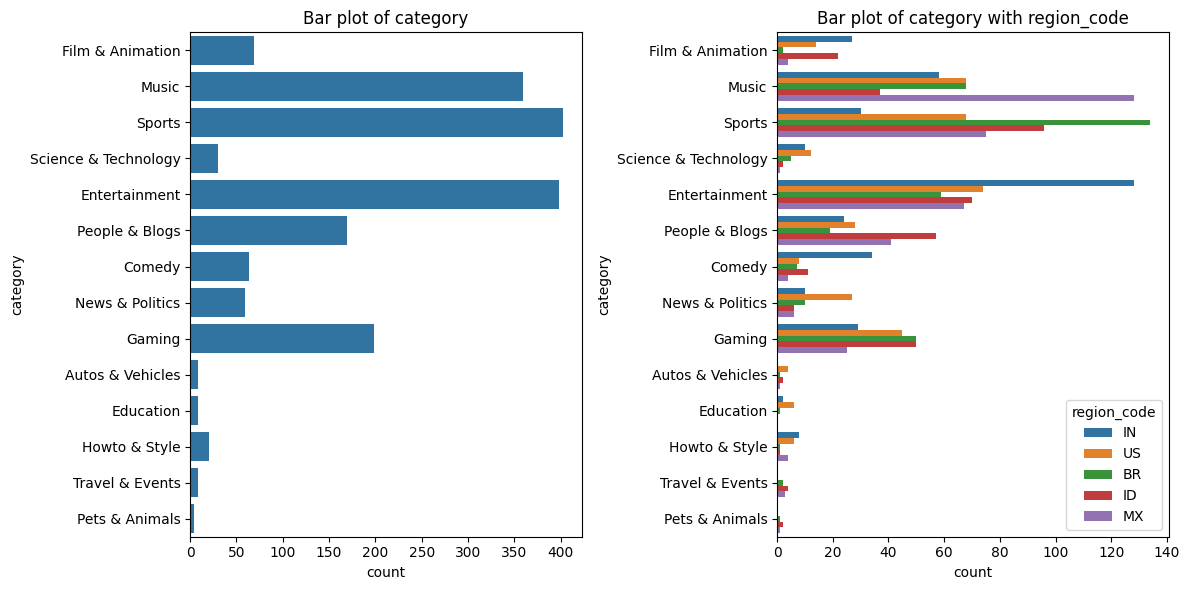

category
Sports                  403
Entertainment           398
Music                   359
Gaming                  199
People & Blogs          169
Film & Animation         69
Comedy                   64
News & Politics          59
Science & Technology     30
Howto & Style            20
Travel & Events           9
Education                 9
Autos & Vehicles          8
Pets & Animals            4
Name: count, dtype: int64
-------------------------------------

Column: caption


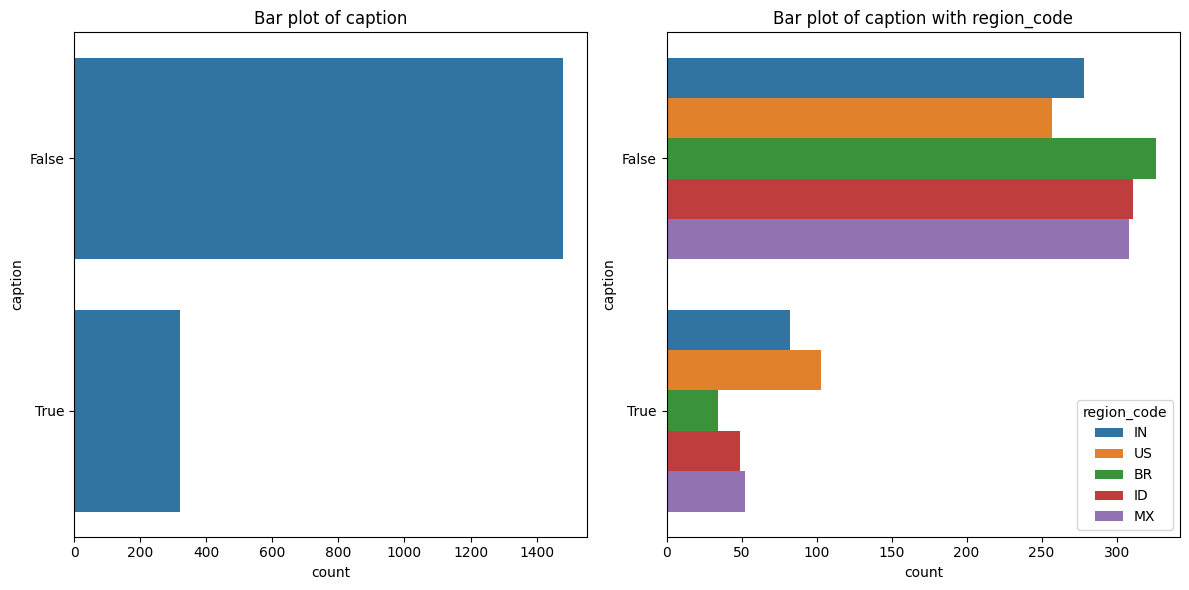

caption
False    1480
True      320
Name: count, dtype: int64
-------------------------------------

publish_date
2025-03-07    69
2025-03-16    66
2025-03-21    66
2025-03-30    63
2025-03-28    59
2025-03-23    59
2025-02-24    57
2025-03-03    54
2025-03-10    53
2025-03-27    53
2025-03-14    52
2025-03-09    52
2025-03-18    52
2025-02-25    51
2025-03-24    50
2025-03-26    50
2025-03-17    48
2025-04-01    47
2025-03-19    46
2025-03-20    45
2025-03-05    45
2025-03-08    45
2025-03-06    44
2025-02-28    44
2025-03-31    42
2025-03-15    40
2025-03-22    39
2025-03-25    38
2025-03-11    37
2025-03-29    37
2025-04-02    33
2025-03-04    32
2025-02-27    31
2025-03-02    31
2025-02-23    30
2025-03-13    30
2025-03-01    29
2025-02-26    26
2025-03-12    21
2025-04-03    17
2025-02-22    12
2025-02-20     2
2025-02-21     2
2025-02-19     1
Name: count, dtype: int64
-------------------------------------

publish_time
00:00:07    31
00:00:06    17
15:00:07    12
05:00:06    12


In [106]:
for col in categorical:
    categorical_univariate(df, col, 'region_code')

##### Insights

- _Sports_ is the most popular category
    - it is followed closely by _Entertainment_ and _Music_  

- Most of the _Sports_ videos are popular in _Brazil_
- Most of the _Entertainment_ videos are popular in _India_
- Most of the _Music_ videos are popular in _Mexico_
- Most of the _Comedy_ videos are popular in _India_

- Out of top 5 videos, 3 are K-pop music videos

In [107]:
df[['title']].value_counts().head(10)

title                                                                                         
j-hope â€˜Sweet Dreams (feat. Miguel)â€™ Official MV                                              9
JENNIE - like JENNIE (Official Video)                                                             9
j-hope â€˜MONA LISAâ€™ Official MV                                                                7
Cazzu - CON OTRA (Official Video)                                                                 7
Race Highlights | 2025 Australian Grand Prix                                                      7
G-DRAGON - TOO BAD (feat. Anderson .Paak) (Official Video)                                        6
HIGHLIGHTS | FC BARCELONA 4 vs 4 ATLETICO MADRID | COPA DEL REY 24/25 (WITH COMMENTARY)           6
JENNIE & Dua Lipa - Handlebars (Official Video)                                                   6
Rari - Peso Pluma (Video Oficial)                                                                 5
HIT 3

In [108]:
df['channel_name'].value_counts().head(10)

channel_name
HYBE LABELS           22
FORMULA 1             18
Canal GOAT            17
JennieRubyJaneVEVO    15
Vijay Television      15
CazÃ©TV               14
Dhot Design           14
RCTI Sports           13
Colors Cineplex       12
T-Series Tamil        12
Name: count, dtype: int64

#### 2.1.2 Numerical Columns

- since many videos are repeated, they are likely to skew the numerical columns
- hence, we will only take the last instance of each video
- this will show the stats of the popular videos after 36 days

In [109]:
df_latest = df.drop_duplicates(subset='id', keep='last')

df_latest.describe()

,category_id,views,likes,comment_count,duration_in_min
count,"1,263.00","1,263.00","1,263.00","1,263.00","1,263.00"
mean,18.57,"1,971,719.17","72,921.90","4,910.22",31.32
std,6.23,"4,106,225.95","144,835.20","10,287.67",71.72
min,1.00,"20,125.00",0.00,0.00,0.28
25%,17.00,"316,638.00","10,743.50",696.50,3.99
50%,20.00,"740,444.00","28,666.00","1,866.00",12.53
75%,24.00,"1,929,988.50","78,721.50","4,722.50",24.85
max,28.00,"56,602,682.00","2,328,540.00","153,045.00",715.00


In [110]:
def numerical_univariate(df, col, hue):
    nbins = None
    range = df[col].max() - df[col].min()
    if range > 500 or abs(df[col].skew()) > 2:
        nbins = 50 if range < 1000 else 100
    print(col)

# histograms with and without hue
    _, axes = plt.subplots(1, 2, figsize=(13, 5))

    sns.histplot(data=df, x=col, kde=True, bins=nbins, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=12)

    sns.histplot(data=df, x=col, kde=True, bins=nbins, hue=df[hue], palette='bright', ax=axes[1])
    axes[1].set_title(f'Distribution of {col} with {hue}', fontsize=12)

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
# boxplots with and without hue
    _, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(data=df, x=col, ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}', fontsize=12)

    sns.boxplot(data=df, x=col, hue=hue, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col} with {hue}', fontsize=12)
    
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    print('----------------------------------- \n')

duration_in_min


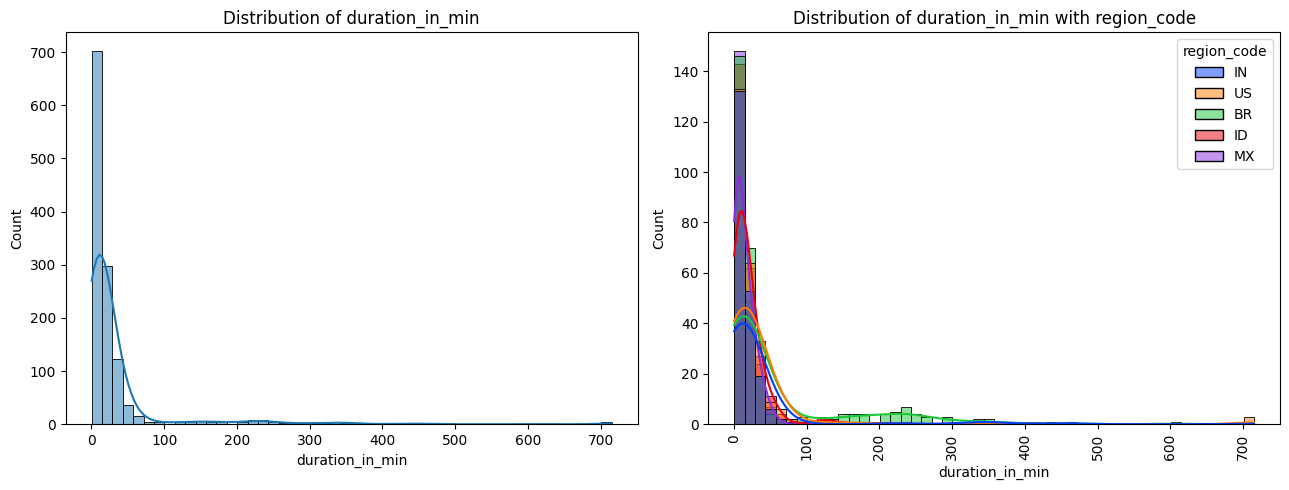

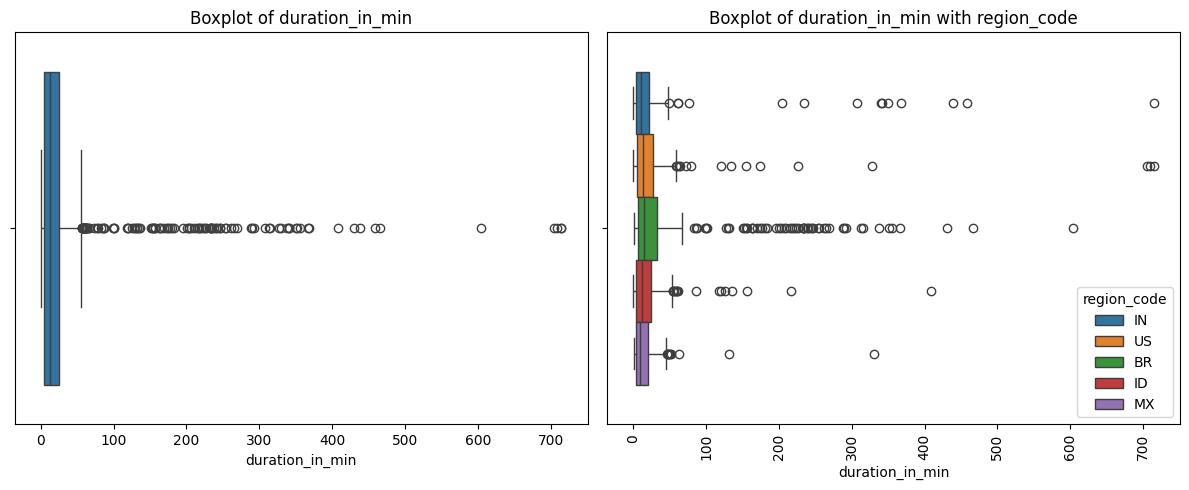

----------------------------------- 

views


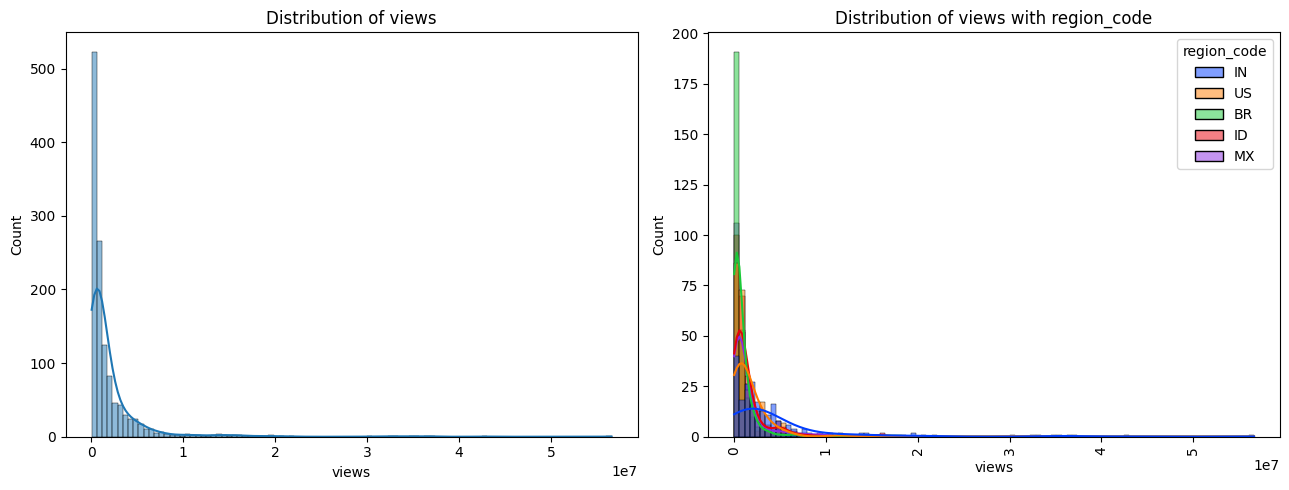

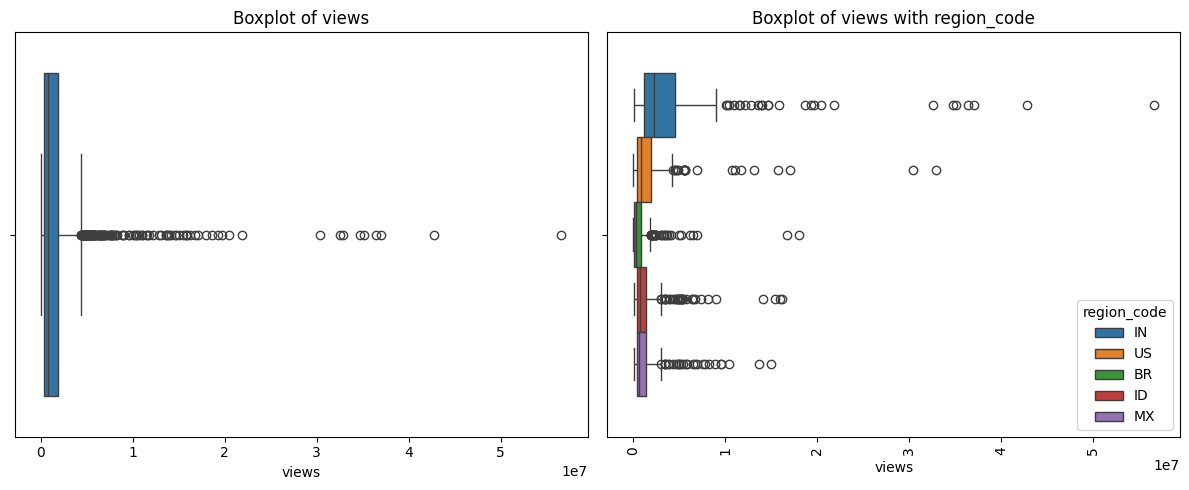

----------------------------------- 

likes


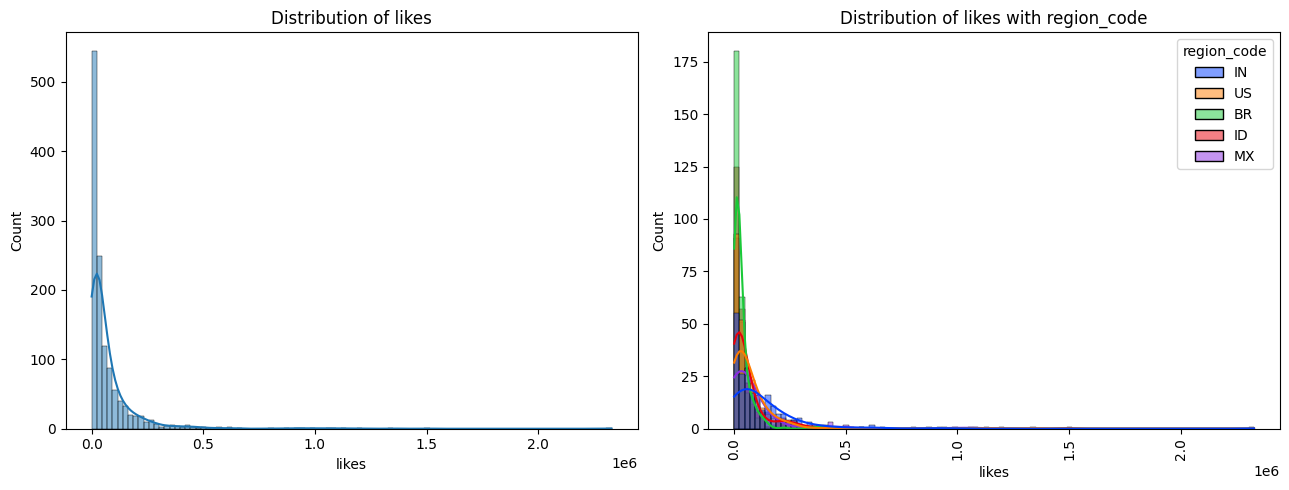

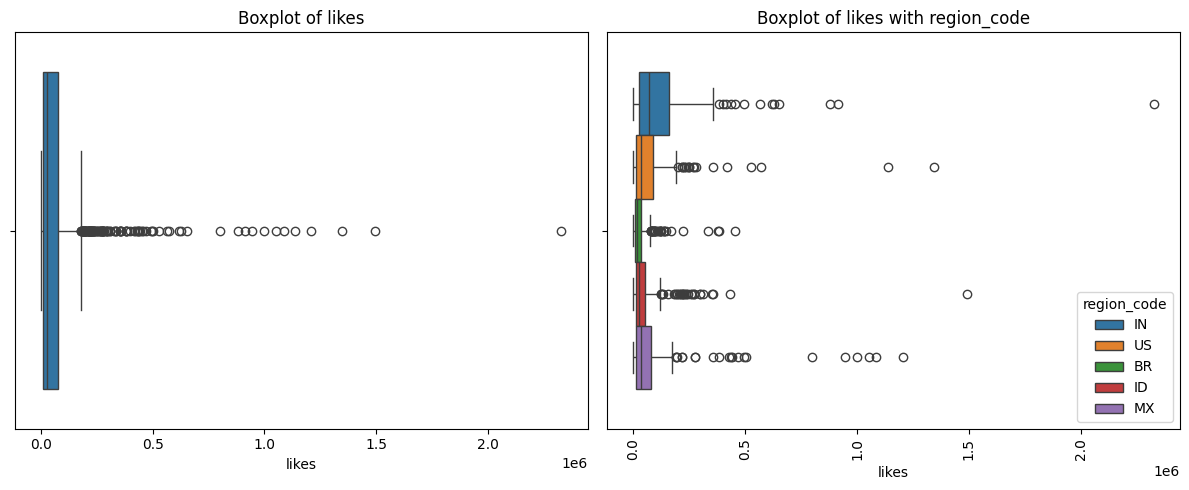

----------------------------------- 

comment_count


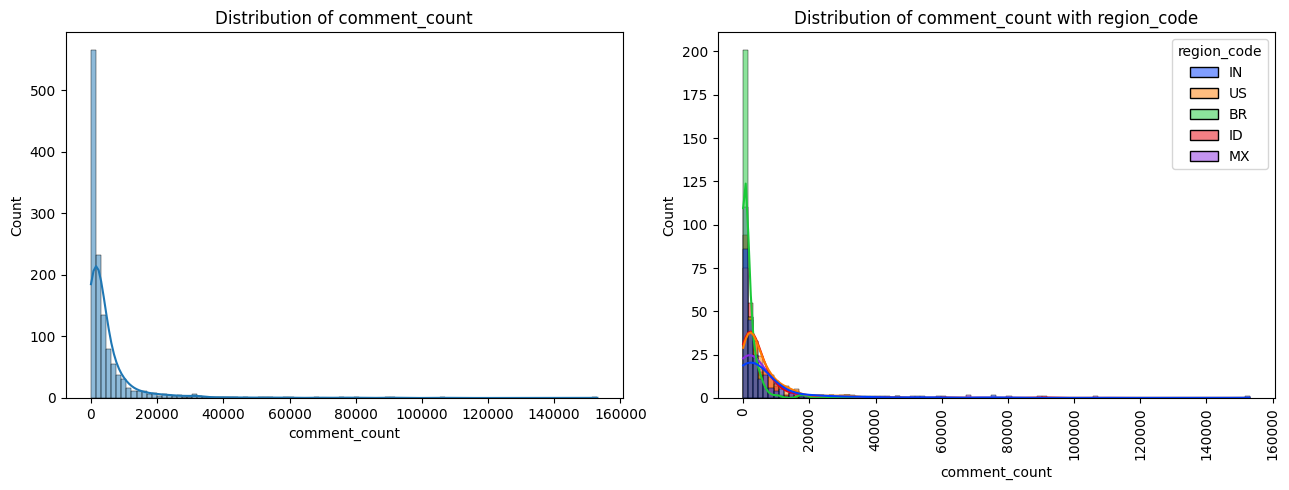

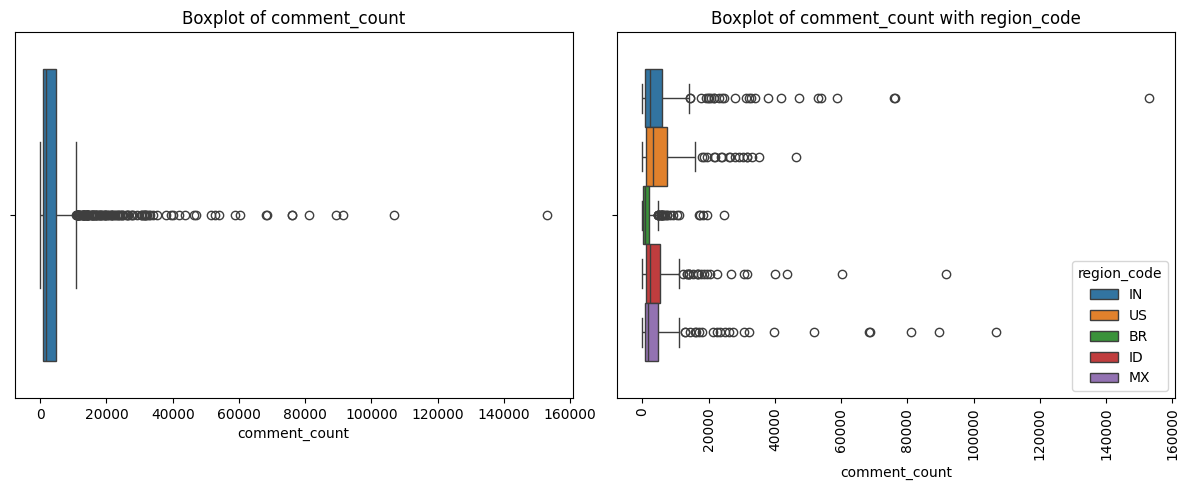

----------------------------------- 



In [111]:
for col in numerical:
    numerical_univariate(df_latest, col, 'region_code')

##### Some Insights from graphs

For overall data:
- clearly, there is a strong correlation between views, likes and comments and even duration
- all the numerical columns have mean larger than median
- but the difference is especially significant for views and likes
- this implies mean in this data set should not be used blindly for analysis

Group by region_code:
- Brazil has largest duration of videos
- Brazil for duration follows the same trend until reaching 150 - 350 min range where it increases again
    - most popular videos remain short videos except some in 150 - 350 min range
- India has most views and likes
    - but for comments it is much more even for all regions
- Brazil has lowest comment_count

#### 2.1.3 Outlier Analysis

- all the numeric columns are heavily skewed to the right
- some outlier analysis can be done to reduce this

- there is a cluster of outliers for videos popular in Brazil.
- analysing what could cause it:

In [112]:
df_latest.loc[(df['region_code'] == 'BR') & ((df['duration_in_min'] >= 100) & (df['duration_in_min'] <= 400)), ['title', 'channel_name', 'category', 'publish_date', 'duration_in_min', 'views', 'likes']]

,title,channel_name,category,publish_date,duration_in_min,views,likes
20,JOGO COMPLETO: CORINTHIANS X GUARANI | SUPER R...,CazÃ©TV,Sports,2025-02-24,261.83,5221183,123359
24,AO VIVO E COM IMAGENS: REMO X PAYSANDU | 7Âª R...,Canal do Benja,Sports,2025-02-23,210.22,628041,25634
70,"ðŸš¨BBB25 SINCERÃƒO: VitÃ³ria ganha ""Craque do...",WebTVBrasileira,Entertainment,2025-02-25,100.10,312149,29207
71,KINGS LEAGUE BRAZIL - APRESENTAÃ‡ÃƒO + DRAFT DAY,Kings League Brasil,Sports,2025-02-25,233.80,236277,12552
77,VASCO X BOTAFOGO | CAMPEONATO CARIOCA | AO VIV...,Canal GOAT,Sports,2025-02-24,265.02,1463916,34215
126,AL WEHDA x AL NASSR - AO VIVO E COM IMAGENS - ...,Esporte na Band,Sports,2025-02-25,129.72,629518,12760
220,MIZAEL - Podpah #884,Podpah,Entertainment,2025-03-01,127.58,400636,38256
270,JOGO COMPLETO: SÃƒO BERNARDO X PALMEIRAS | QUA...,CazÃ©TV,Sports,2025-03-02,217.85,6959423,138562
271,COM IMAGENS - VASCO X FLAMENGO- CARIOCA 2025 -...,Vasco TV,Sports,2025-03-01,240.68,2157856,71936
272,BAHIA 1 X 2 JACUIPENSE | PARTIDA COMPLETA | BA...,TVE Bahia,Sports,2025-03-01,152.20,492293,12624


- the outliers in duration of videos in Brazil is due to live sports matches

In [113]:
# checking mean and median
for col in numerical:
    print(f"Mean of {col} is {df_latest[col].mean()}")
    print(f"Median of {col} is {df_latest[col].median()}")
    print()

Mean of duration_in_min is 31.319659540775934
Median of duration_in_min is 12.53

Mean of views is 1971719.1670625494
Median of views is 740444.0

Mean of likes is 72921.89865399842
Median of likes is 28666.0

Mean of comment_count is 4910.222486144101
Median of comment_count is 1866.0



In [114]:
for col in numerical:
    print(col)
    print(f"Max: {df_latest[col].max()}")
    print(f"Min: {df_latest[col].min()}")
    print()

duration_in_min
Max: 715.0
Min: 0.28

views
Max: 56602682
Min: 20125

likes
Max: 2328540
Min: 0

comment_count
Max: 153045
Min: 0



In [153]:
def remove_outliers(df, col, region_code=None):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [1]:
df.clean = df_latest

for col in numerical:
   df_clean = (
    df.groupby('region_code', group_keys=False).apply(lambda x: remove_outliers(x, col=col))
)

NameError: name 'df_latest' is not defined

In [130]:
for col in numerical:
    print(f"Mean of {col} is {df_clean[col].mean()}")
    print(f"Median of {col} is {df_clean[col].median()}")
    print()

Mean of duration_in_min is 33.30617750439367
Median of duration_in_min is 13.36

Mean of views is 1331093.6010544815
Median of views is 645184.0

Mean of likes is 45159.26274165202
Median of likes is 24688.5

Mean of comment_count is 2482.318101933216
Median of comment_count is 1542.0



In [117]:
df_clean.describe()

,category_id,views,likes,comment_count,duration_in_min
count,"1,138.00","1,138.00","1,138.00","1,138.00","1,138.00"
mean,18.93,"1,331,093.60","45,159.26","2,482.32",33.31
std,5.88,"2,056,002.32","56,284.70","2,523.24",75.08
min,1.00,"20,125.00",0.00,0.00,0.28
25%,17.00,"282,588.25","9,735.75",619.00,4.42
50%,20.00,"645,184.00","24,688.50","1,542.00",13.36
75%,24.00,"1,498,007.00","59,394.75","3,552.00",25.45
max,28.00,"19,653,593.00","572,937.00","10,670.00",715.00


duration_in_min


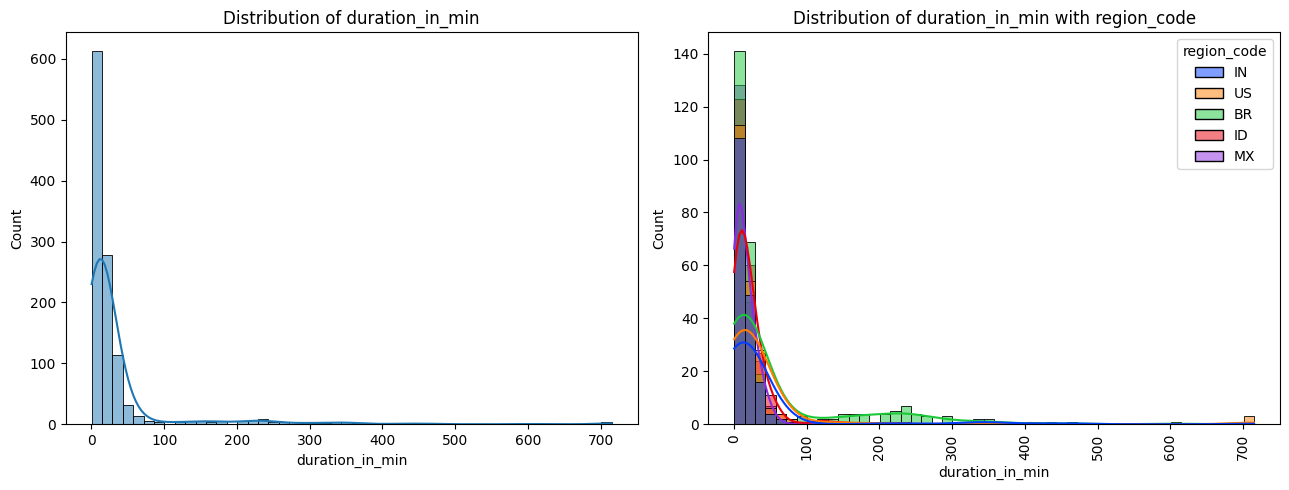

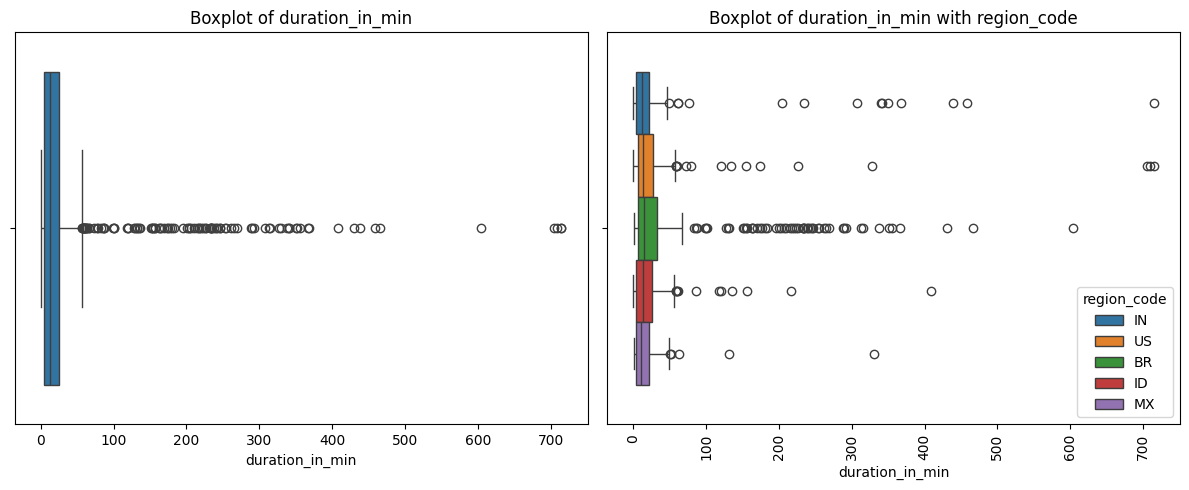

----------------------------------- 

views


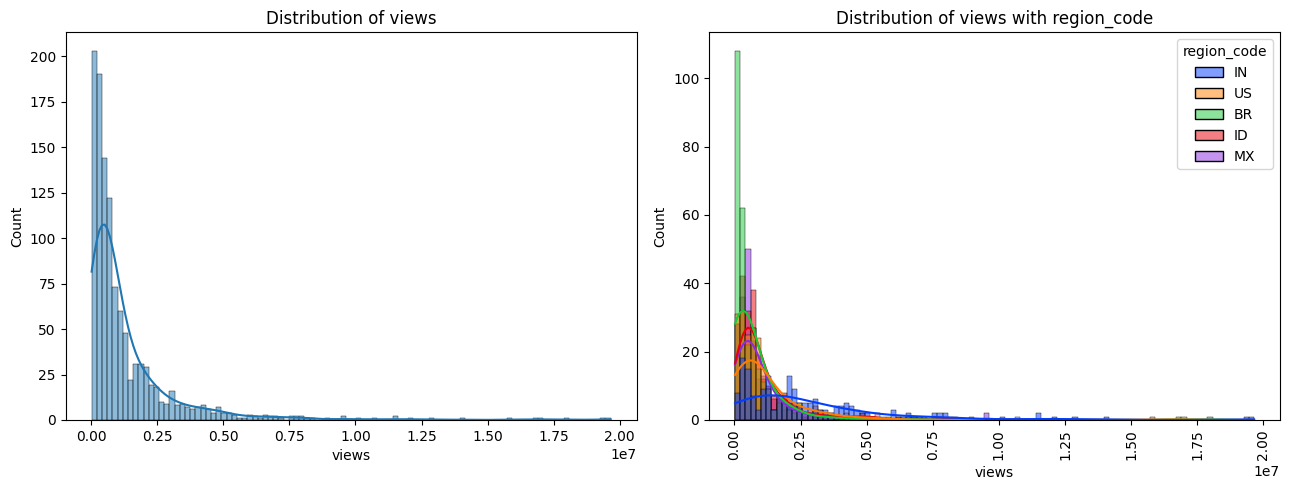

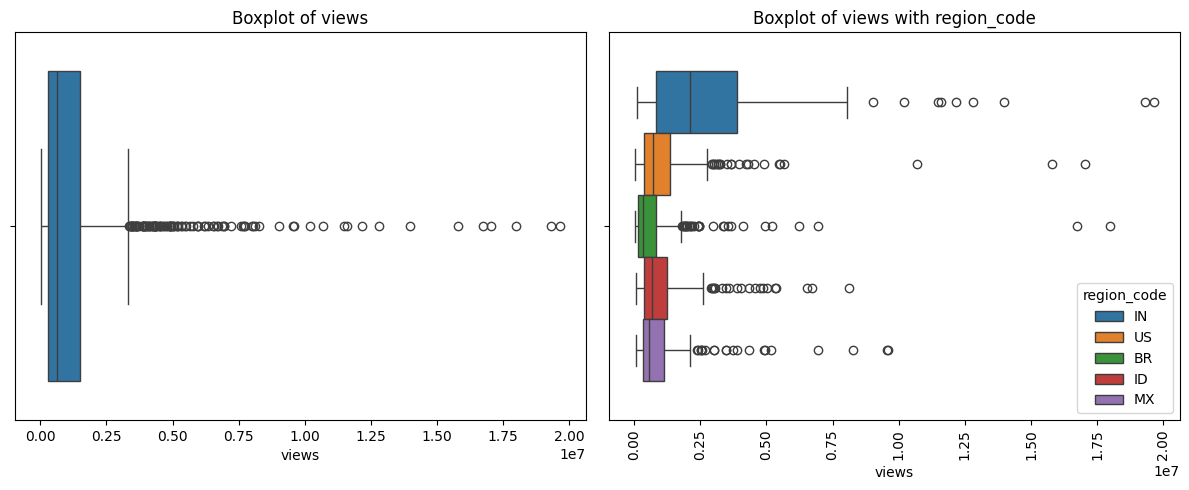

----------------------------------- 

likes


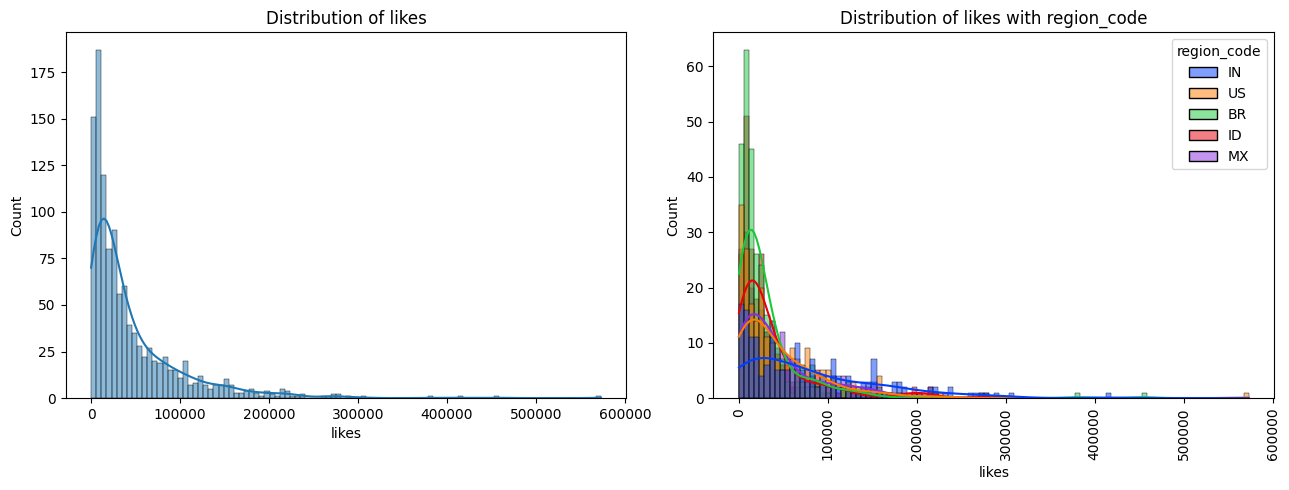

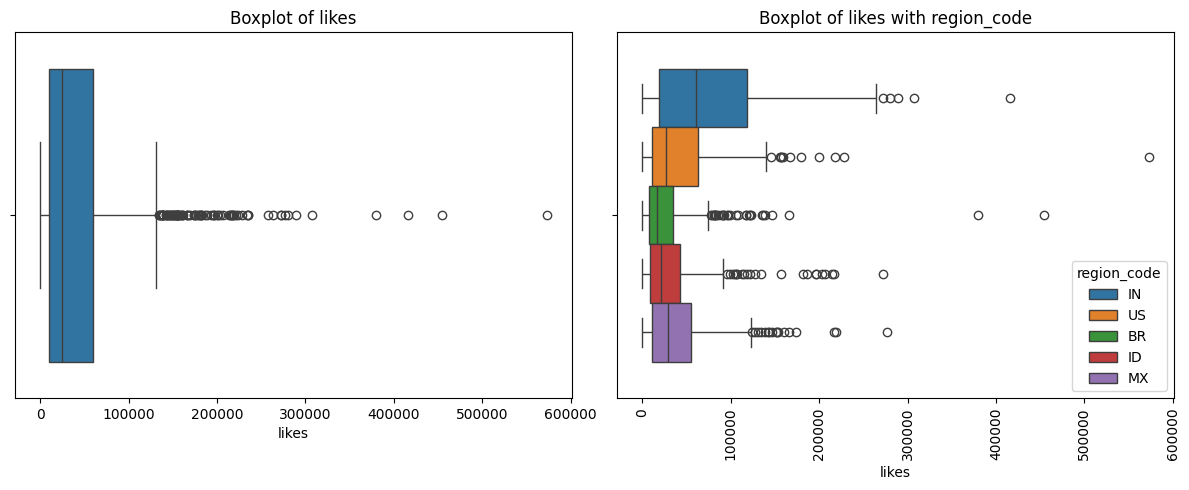

----------------------------------- 

comment_count


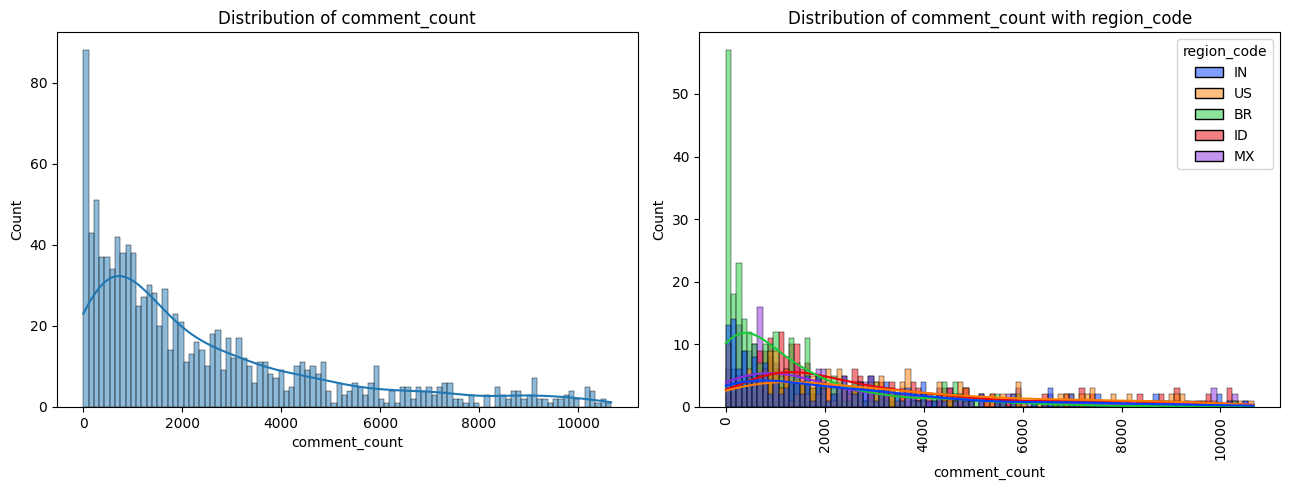

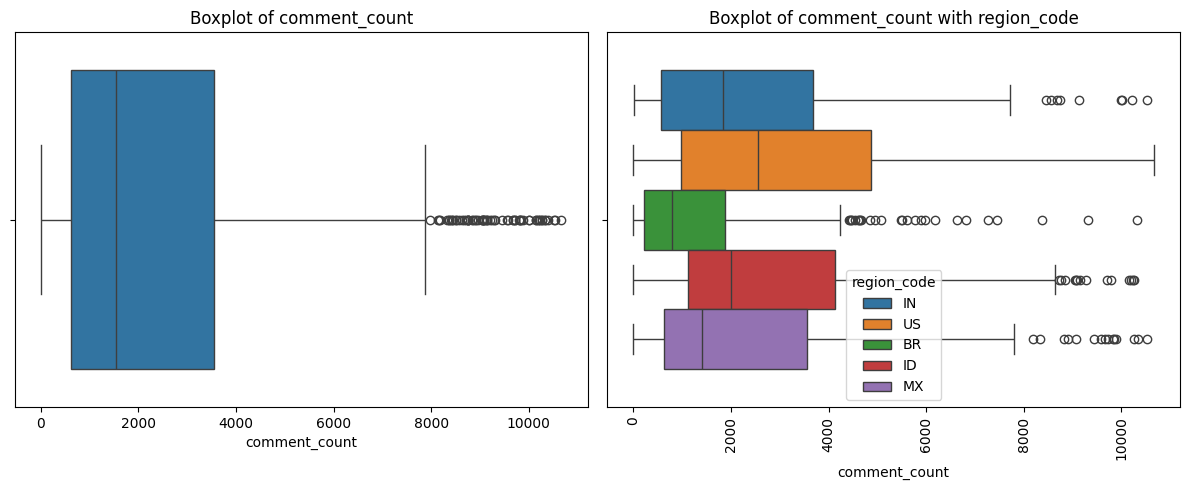

----------------------------------- 



In [118]:
for col in numerical:
    numerical_univariate(df_clean, col, 'region_code')

- we can see a clearer view of trends in numerical columns now

In [119]:
df_clean.describe()

,category_id,views,likes,comment_count,duration_in_min
count,"1,138.00","1,138.00","1,138.00","1,138.00","1,138.00"
mean,18.93,"1,331,093.60","45,159.26","2,482.32",33.31
std,5.88,"2,056,002.32","56,284.70","2,523.24",75.08
min,1.00,"20,125.00",0.00,0.00,0.28
25%,17.00,"282,588.25","9,735.75",619.00,4.42
50%,20.00,"645,184.00","24,688.50","1,542.00",13.36
75%,24.00,"1,498,007.00","59,394.75","3,552.00",25.45
max,28.00,"19,653,593.00","572,937.00","10,670.00",715.00


### 2.2 Bivariate Analysis

In [120]:
for col in numerical:
    print(f'{col} has skew : {df[col].skew()}')

duration_in_min has skew : 5.714763192047082
views has skew : 5.359740125208514
likes has skew : 4.463185280515829
comment_count has skew : 4.424136516990182


since the graphs are extremely skewed to right, we will normalize them to identify patterns better in bivariate analysis

In [121]:
# df = df[numerical]
# for col in numerical:
#     df[col] = np.log1p(df[col])

#### 2.2.1 Numerical vs Numerical

In [122]:
# sns.pairplot(df[numerical], diag_kind='kde')
# plt.show()

In [ ]:
cols = numerical.copy()
cols.append('region_code')
df1 = df_latest[cols]

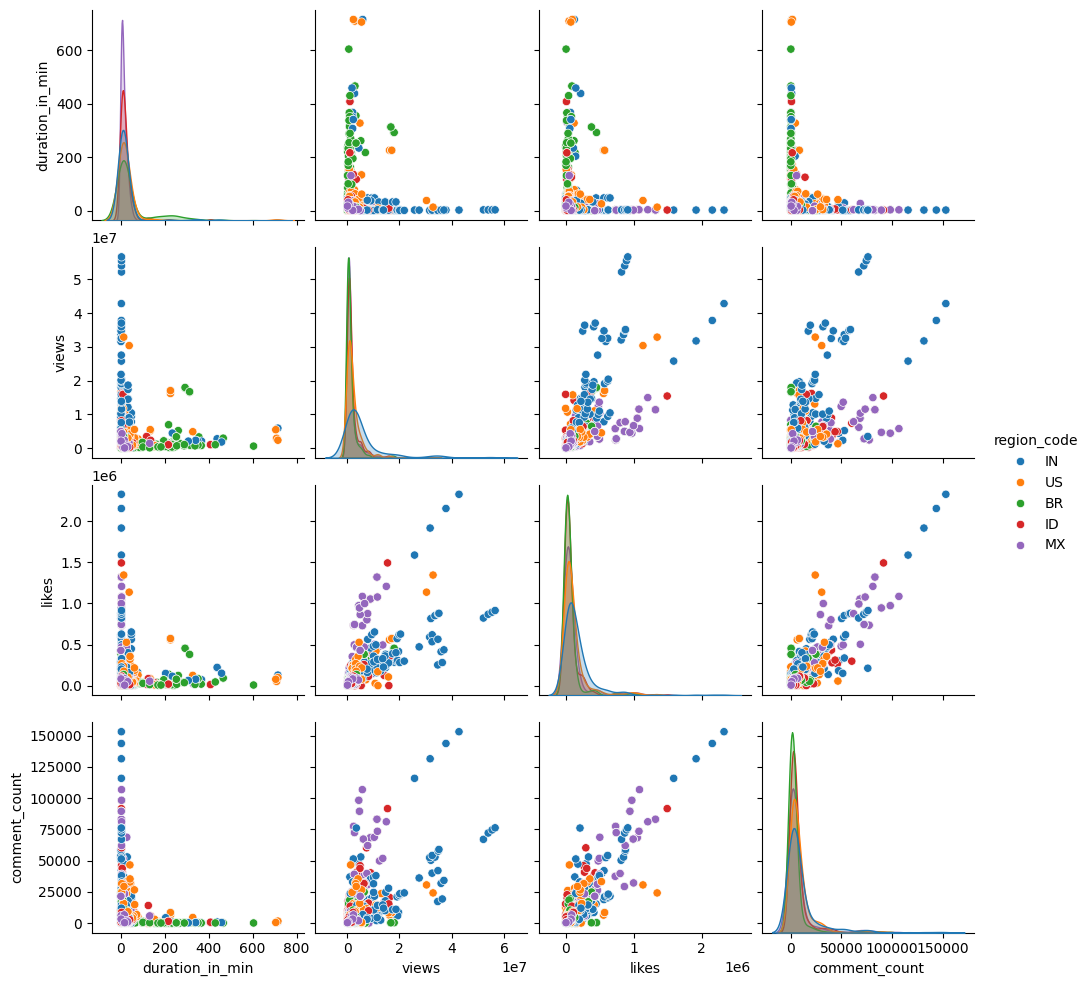

In [138]:
sns.pairplot(df1, diag_kind='kde', hue='region_code')
plt.show()

##### Insights
- There is a strong linear correlation between 
    - `views` and `likes`
    - `views` and `comment_count`
    - `likes` and `comment_count`

- There are clusters of outliers
    - Brazil in duration_in_min

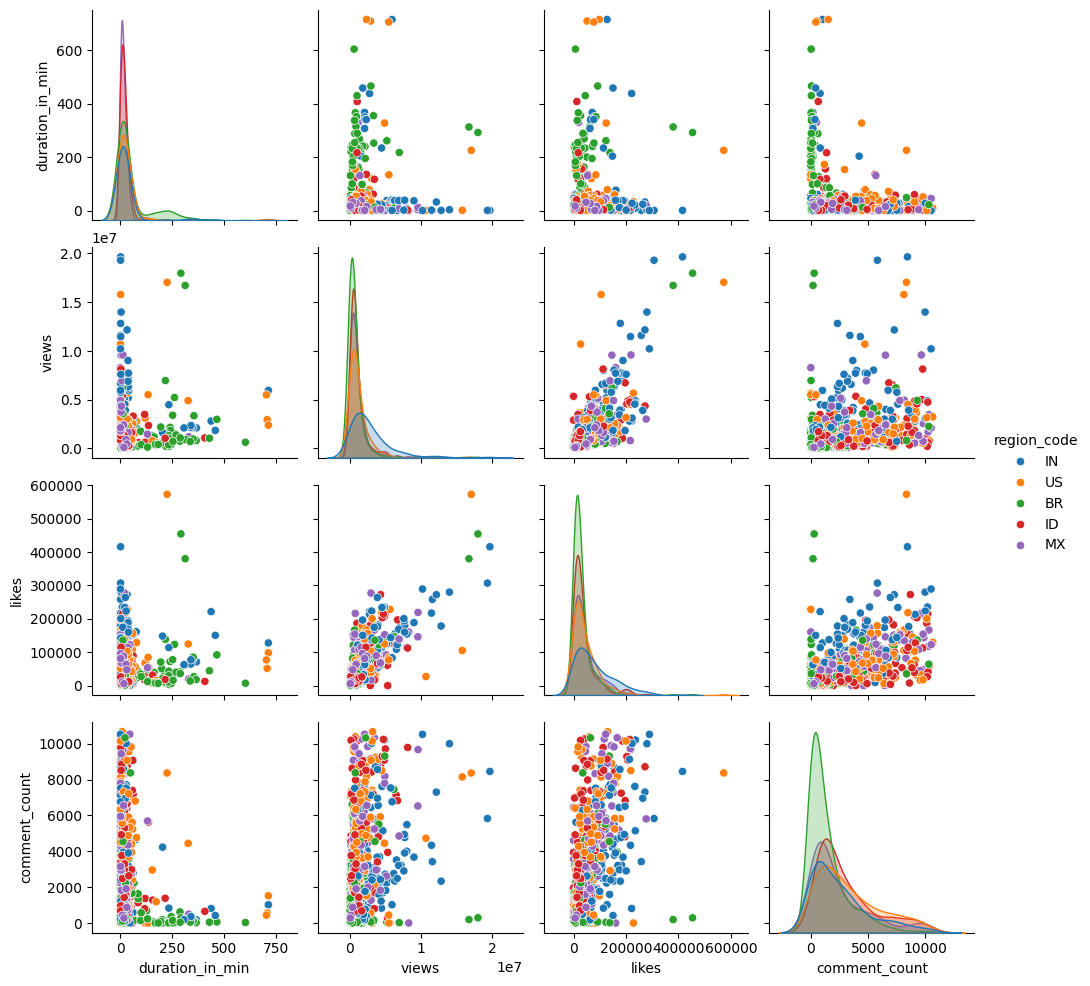

In [139]:
df1 = df_clean[cols]
sns.pairplot(df1, diag_kind='kde', hue='region_code')
plt.show()

- the cleaned version looks very messy.
- it seems that the correlation reduced, but it is probably because there are too many values which makes it difficult to make out any patterns
- lets look at the graphs for each country to see the patterns better

- we have already established that duration doesnt have much correlation- so we drop that column in df1

In [150]:
df1 = df1.drop(columns='duration_in_min')

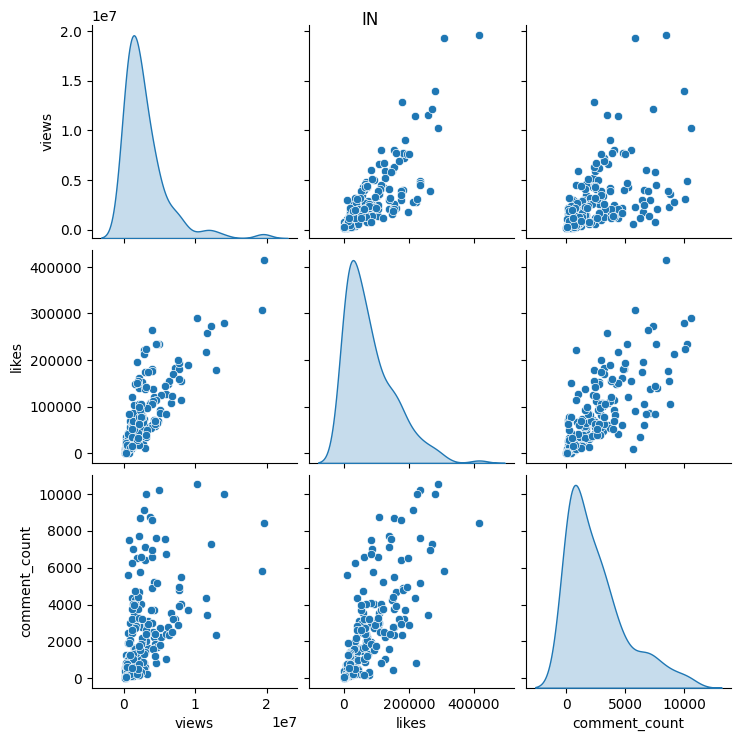

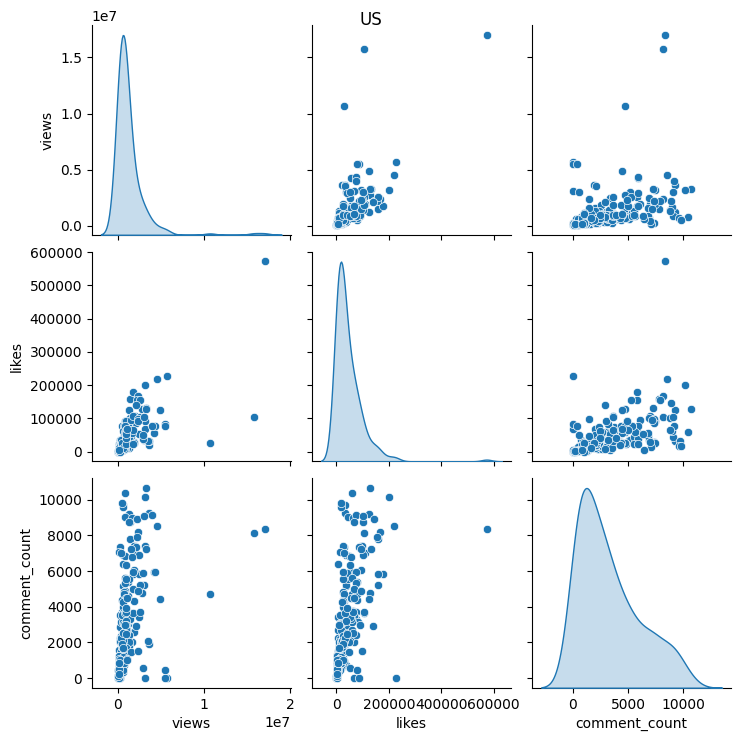

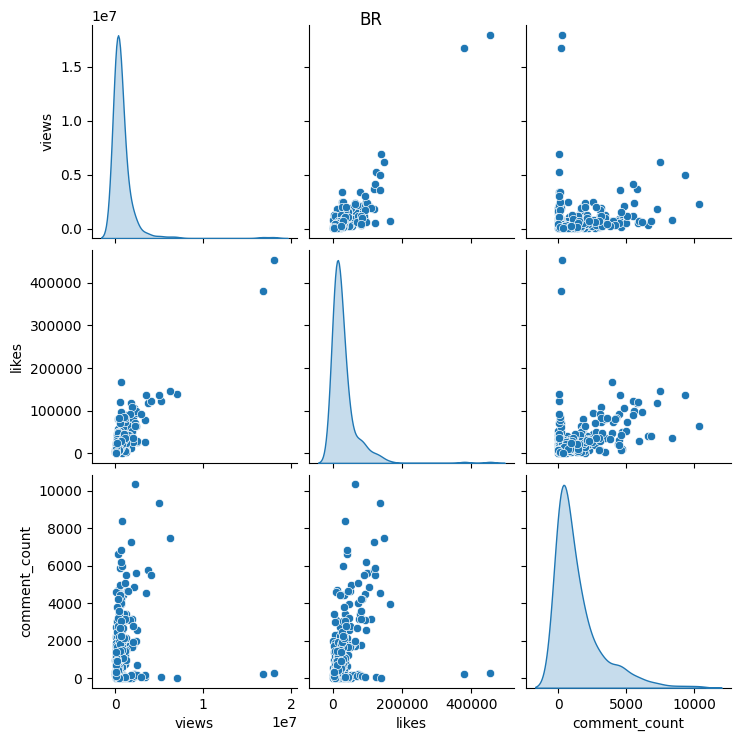

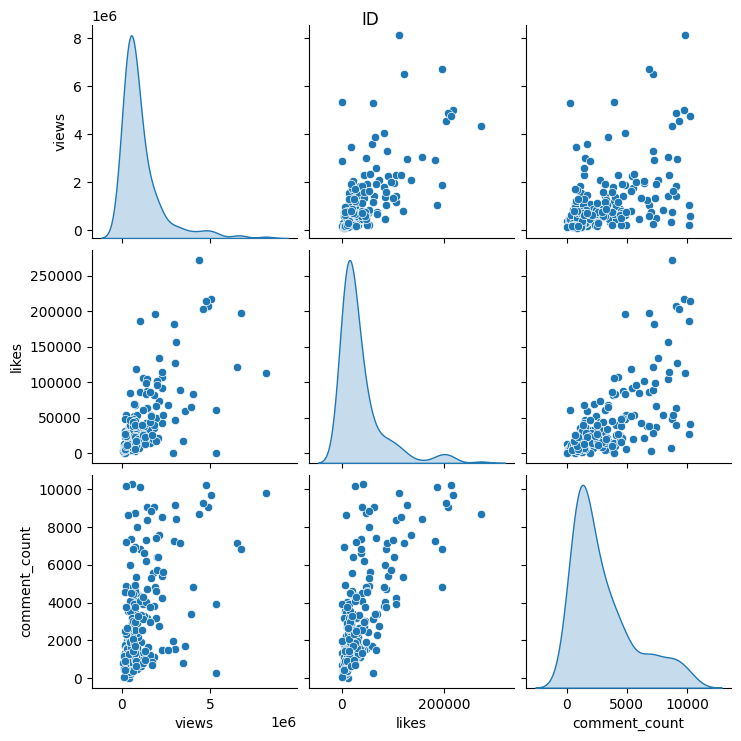

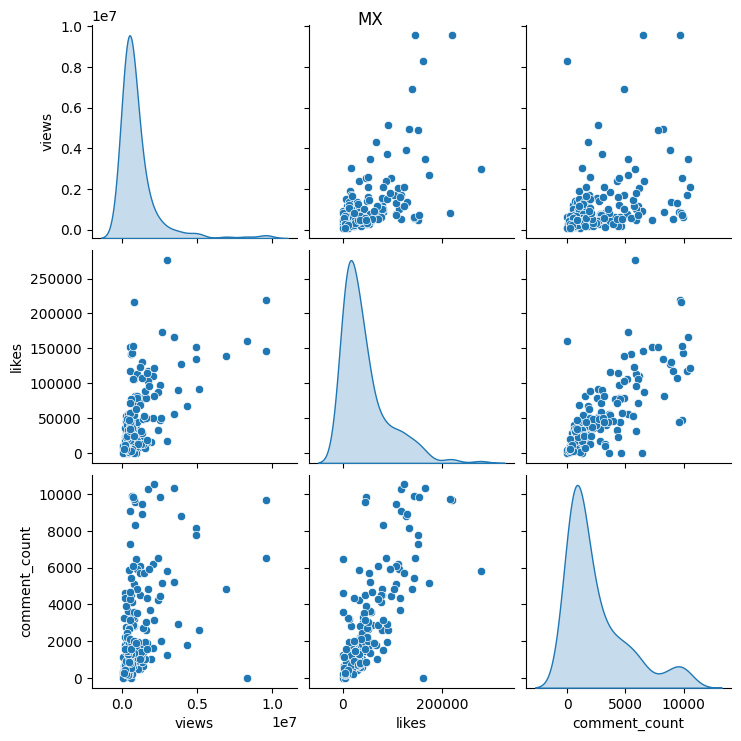

In [151]:
for country in ['IN', 'US', 'BR', 'ID', 'MX']:
    g = sns.pairplot(df1[(df1.region_code == country)], diag_kind='kde')
    g.figure.suptitle(country)
    plt.show()

In [125]:
df.head()

,id,region_code,publish_date_time,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count,publish_date,publish_time,duration_in_min,category
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,1,PT1M45S,True,16695651,323858,6688,2025-02-24,05:37:32,1.75,Film & Animation
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,10,PT2M58S,False,25780803,1588648,115750,2025-02-22,11:30:08,2.97,Music
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not DisappointedÂ atÂ All | #PAKVIND | Sh...,17,PT3M53S,False,2064436,83781,5386,2025-02-23,17:12:10,3.88,Sports
3,DQnZhK6Y27g,IN,2025-02-23 06:11:52+00:00,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | à...,28,PT29M42S,False,4442627,300654,47471,2025-02-23,06:11:52,29.70,Science & Technology
4,UTaWdNZkGcM,IN,2025-02-23 17:21:39+00:00,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India à¤•à¥€ Pakistan à¤ªà¤° Virat...,17,PT11M48S,False,1374247,59617,3526,2025-02-23,17:21:39,11.80,Sports


##### 2.2.2 Numerical vs Categorical

In [126]:
categorical

['title',
 'channel_name',
 'category',
 'caption',
 'publish_date',
 'publish_time']

In [127]:
numerical

['duration_in_min', 'views', 'likes', 'comment_count']

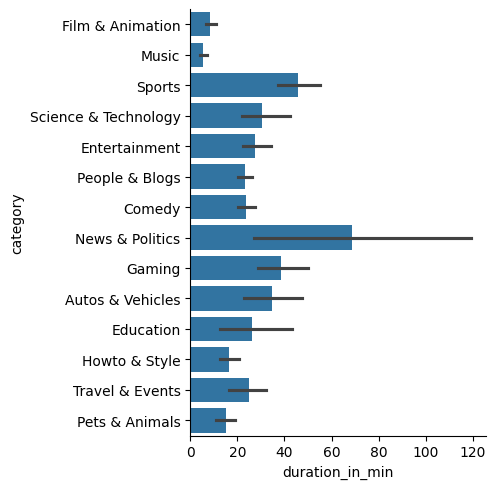

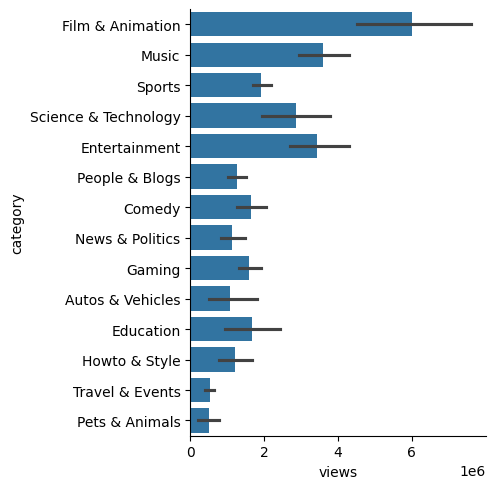

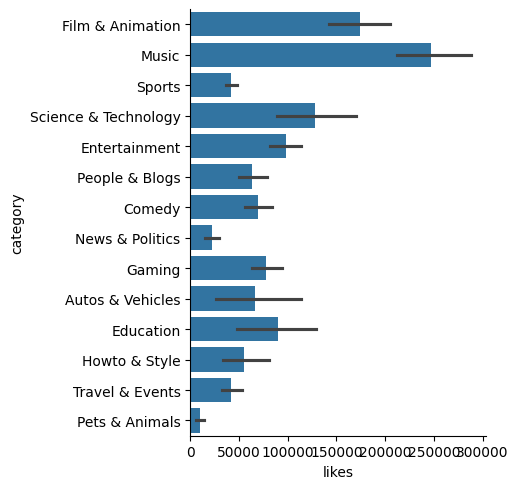

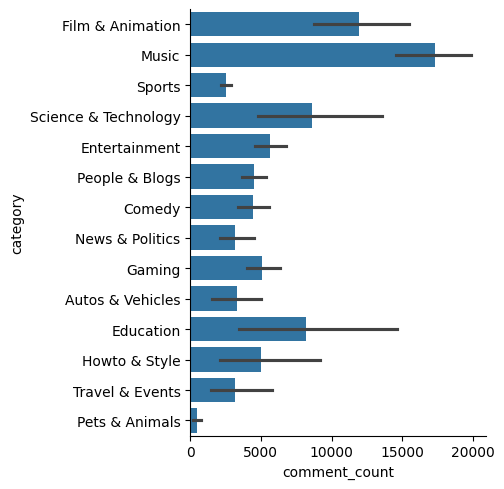

In [128]:
for x in numerical:
    sns.catplot(data=df, x=x, y='category', kind='bar')
    plt.show()

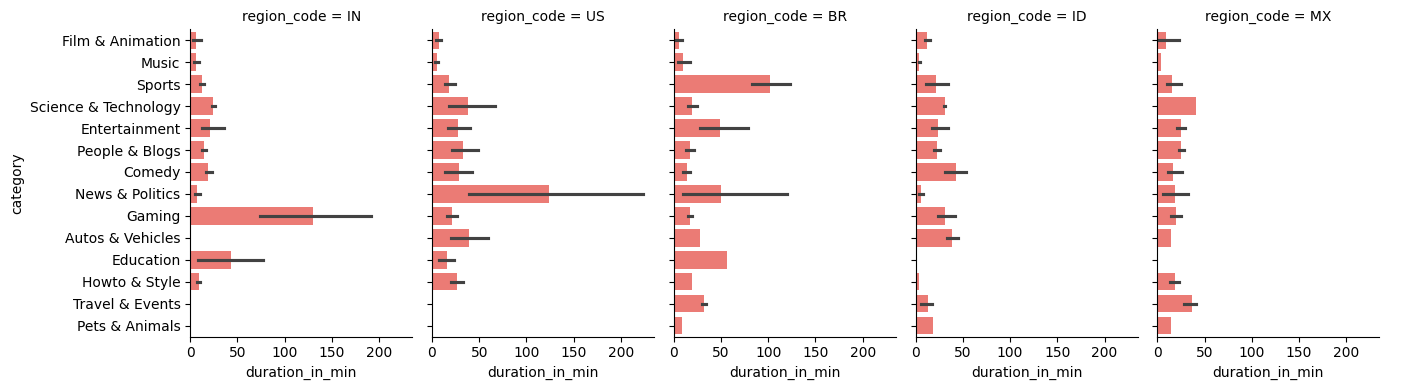

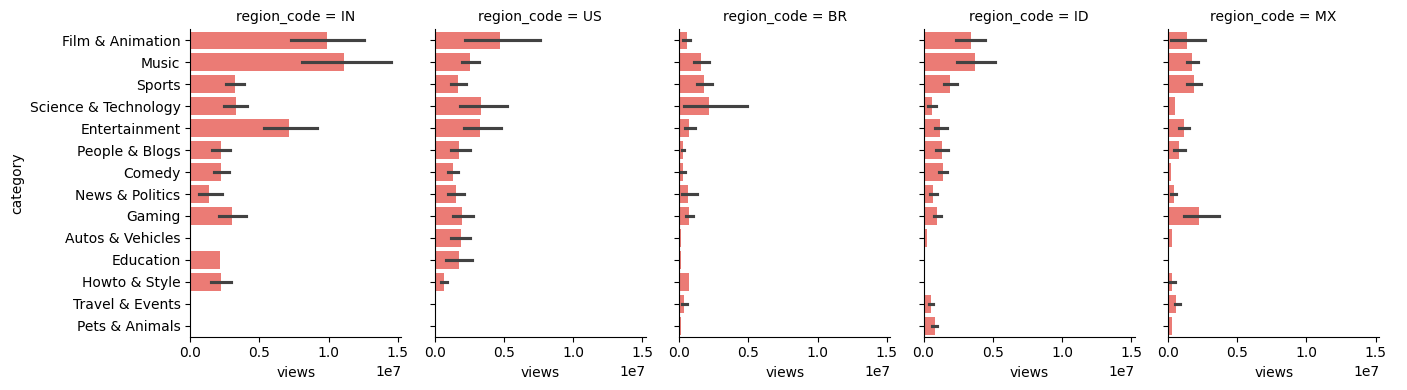

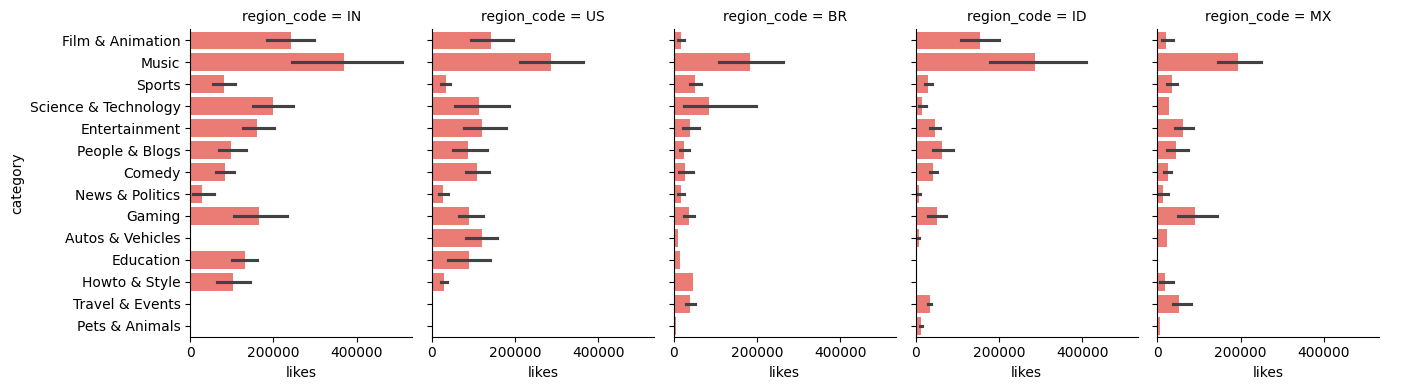

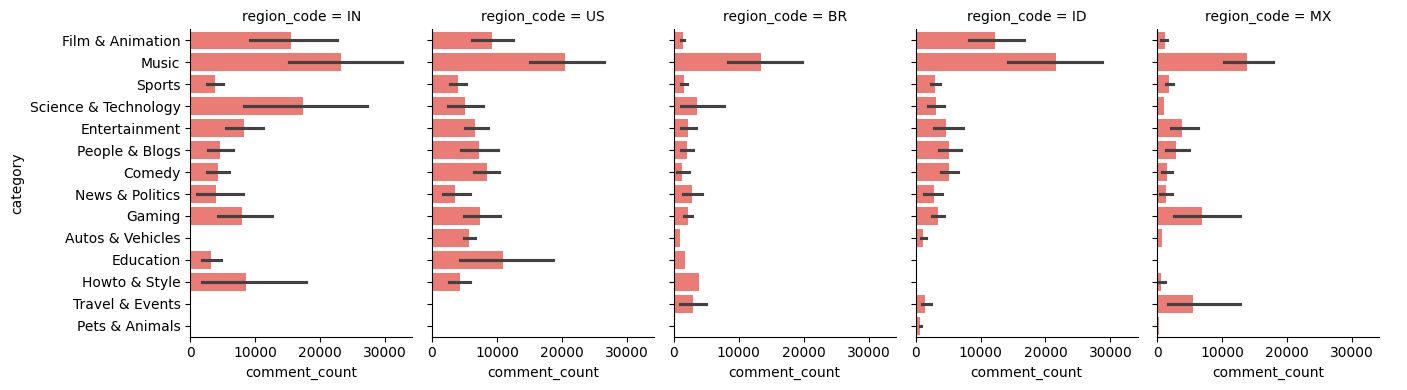

In [129]:
for x in numerical:
    sns.catplot(data=df, x=x, y='category', kind='bar', col='region_code', height=4, aspect=0.7, color='#FF6961')
    plt.show()

##### Insights

- duration_in_min
    - in India, significantly long popular videos are from Gaming and Education
    - in Brazil, significantly long popular videos are from Sports and Gaming
- views
    - in India, Music anf 'Film and Animation' get the highest views 

##### 2.2.3 Categorical vs Categorical